In [22]:
from typing import Any
from zellij.core import ArrayVar, FloatVar, Loss, Experiment, Threshold
from zellij.strategies import PHS, ILS, DBA
from zellij.strategies.tools import Hypersphere, Distance_to_the_best, Move_up
from zellij.utils.converters    import FloatMinmax, ArrayConverter, Basic


class Instance:
    def __init__(self, n_instance) -> None:
        self.n_instance


def himmelblau(x):
    x_ar = np.array(x)
    obj = (x_ar[0] ** 2 + x_ar[1] - 11) ** 2 + (x_ar[0] + x_ar[1] ** 2 - 7) ** 2
    return obj

lf = Loss(save=True)(himmelblau)

values = ArrayVar(converter=ArrayConverter())
for i in range(dim):
    values.append(FloatVar("float_1", -5 , 5, converter=FloatMinmax()))
sp = Hypersphere(values, lf, converter=Basic())

explor = PHS(sp, inflation=1.75)
exploi = ILS(sp, inflation=1.75)
stop1 = Threshold(None, "current_calls", 3)  # set target to None, DBA will automatically asign it.
stop2 = Threshold(None,"current_calls", 100)  # set target to None, DBA will automatically asign it.
dba = DBA(sp, Move_up(sp,5),(explor,stop1), (exploi,stop2),scoring=Distance_to_the_best())

stop3 = Threshold(lf, "calls",10000)


exp = Experiment(dba, stop3, save="exp_dba", backup_interval=5)
exp.run()
print(f"Best solution:f({lf.best_point})={lf.best_score}")

Saving folder already exists, exp_dba. Results will still be saved in it.


Best solution:f([-2.806851743923663, 3.1295378498418955])=0.00022825856070177858


In [2]:
from zellij.utils.benchmarks import himmelblau
from zellij.core import ArrayVar, FloatVar, Loss, Experiment, Threshold, BooleanStop
from zellij.strategies import DBA, CenterSOO
from zellij.strategies.tools import Section, Min, Soo_tree_search
from zellij.utils.converters import FloatMinmax, ArrayConverter, Basic

lf = Loss(save=True)(himmelblau)
values = ArrayVar(
    FloatVar("float_1", -5 , 5, converter=FloatMinmax()),
    FloatVar("float_2", -5, 5, converter=FloatMinmax()),
    converter=ArrayConverter(),
)
sp = Section(values, lf, section=3, converter=Basic())

explor = CenterSOO(sp)
stop1 = BooleanStop(explor, "computed")  # set target to None, DBA will automatically asign it.
dba = DBA(sp, Soo_tree_search(sp,600),(explor,stop1), scoring=Min())

stop3 = Threshold(lf, "calls",1000)
exp = Experiment(dba, stop3, save="exp_soo")
exp.run()
print(f"Best solution:f({lf.best_point})={lf.best_score}")

Saving folder already exists, exp_soo. Results will still be saved in it.


Best solution:f([-2.80511818774768, 3.1313123710398294])=1.2209094465585651e-12


In [4]:
from zellij.core import ArrayVar, FloatVar, Loss, Experiment, Threshold, BooleanStop
from zellij.utils.benchmarks import himmelblau
from zellij.strategies import DBA_Direct, DirectSampling
from zellij.strategies.tools import Direct, Nothing, Potentially_Optimal_Rectangle
from zellij.utils.converters import FloatMinmax, ArrayConverter, Basic

lf = Loss(save=True)(himmelblau)
values = ArrayVar(
    FloatVar("float_1", -5 , 5, converter=FloatMinmax()),
    FloatVar("float_2", -5, 5, converter=FloatMinmax()),
    converter=ArrayConverter(),
)
sp = Direct(values, lf, converter=Basic())

explor = DirectSampling(sp)
stop1 = BooleanStop(explor, "computed")  # set target to None, DBA will automatically asign it.
dba = DBA_Direct(sp, Potentially_Optimal_Rectangle(sp,600),(explor,stop1),scoring=Nothing())

stop2 = Threshold(lf, "calls",1000)
exp = Experiment(dba, stop2, save="exp_direct")
exp.run()
print(f"Best solution:f({lf.best_point})={lf.best_score}")

Saving folder already exists, exp_direct. Results will still be saved in it.


Best solution:f([-3.7037037037037033, -3.2098765432098766])=0.40282952097559543


In [ ]:
print(f"Best solution:f({lf.best_point})={lf.best_score}")

In [ ]:
import pickle

exp = pickle.load(open("exp_dba/backup/experiment.p","rb"))
exp.meta.search_space.loss.model = himmelblau
exp.run()

       float_1   float_2   objective  eval_time  start_time  end_time  \
0     2.928932  0.000000   22.436559   0.000015    0.002577  0.002592   
1     4.741117  1.812184  177.684829   0.000028    0.003571  0.003598   
2     1.116748 -1.812184  140.506629   0.000007    0.003639  0.003646   
3     0.000000  2.928932   67.634252   0.000008    0.003943  0.003951   
4     1.812184  4.741117  307.806762   0.000008    0.004018  0.004025   
...        ...       ...         ...        ...         ...       ...   
9995  2.448673  2.249186    7.846562   0.000005    0.531403  0.531409   
9996  2.555365  2.249186    5.309752   0.000005    0.531503  0.531508   
9997  2.341982  2.249186   10.826988   0.000005    0.531540  0.531546   
9998  2.662056  2.249186    3.289485   0.000005    0.531640  0.531645   
9999  2.448673  2.249186    7.846562   0.000005    0.531677  0.531682   

     algorithm  level  father  f_id  c_id  
0          PHS      1       0     0     0  
1          PHS      1       0     0

[]

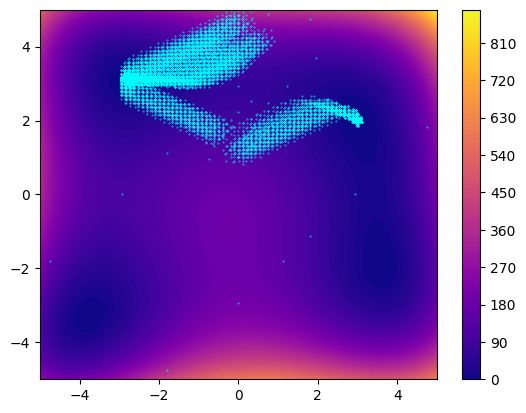

In [23]:
from zellij.utils.benchmarks import Styblinsky_tang
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



data = pd.read_csv("exp_dba/outputs/all_evaluations.csv")
print(data)

fig, ax = plt.subplots()
x = y = np.linspace(-5, 5, 100)
X,Y = np.meshgrid(x,y)
Z = (X ** 2 + Y - 11) ** 2 + (X + Y ** 2 - 7) ** 2


map = ax.contourf(X,Y,Z,cmap="plasma", levels=100)
fig.colorbar(map)

plt.scatter(data["float_1"],data["float_2"],c="cyan",s=0.1)
plt.plot()

In [1]:
from typing import Any
from zellij.core import ArrayVar, FloatVar, Loss, Experiment, Threshold
from zellij.strategies import PHS, ILS, DBA
from zellij.strategies.tools import Hypersphere, Distance_to_the_best, Move_up, Level
from zellij.utils.converters    import FloatMinmax, ArrayConverter, Basic

import numpy as np
from Problem.SCP.scp import SCP

problem = SCP()

data = problem.readinstance()

lf = Loss()(problem)
variables = ArrayVar(converter=ArrayConverter())

for i in range(len(problem.cost)):
    variables.append(FloatVar("float_"+str(i), -5 , 5, converter=FloatMinmax()),)



sp = Hypersphere(variables, lf, measure=Level(), converter=Basic())


points = sp.random_point(3)

cp = []

for p in points:
    cp.append(variables.converter.convert(p))

X,Y,_ = lf(cp)

[0.20310054888320375, 0.2337139505700232, 0.41142160980047837, 0.8800532077663863, 0.4161484311095608, 0.6666008658394638, 0.22947955991998792, 0.06793236554101681, 0.42777445628570765, 0.5869945499797942, 0.8501049568450563, 0.7058266897481962, 0.10923797273092006, 0.6588387923343759, 0.8340955279647156, 0.43544624397661896, 0.7074824889284513, 0.09441420149206534, 0.5728446681034457, 0.8455282257612418, 0.9570845344652014, 0.1555984582021793, 0.4447817041169115, 0.19642037928257872, 0.4208644624123091, 0.044513911948672824, 0.6959015336627868, 0.5975802676682409, 0.8998346969331937, 0.6632384292921866, 0.1789691221346005, 0.44609082292591706, 0.5459657931747021, 0.1630590231029858, 0.05549785017787512, 0.2252915457647402, 0.5844309172348909, 0.857391560609781, 0.04936101669561381, 0.2545602980582772, 0.5091152764038362, 0.4543623694582236, 0.7439867812040883, 0.6572262859938752, 0.8020158217304667, 0.9974706823823919, 0.7645557482446705, 0.9701063672154685, 0.4308956142150798, 0.0566

In [26]:
print()

ArrayVar(, [])